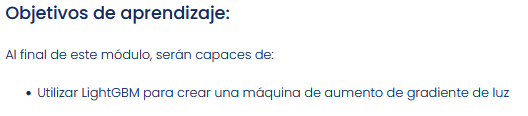

# LightGBM

Es una biblioteca que permite la creacion de maquinas de aumento de gradiente. Se suma a un algoritmo clasico de potenciacion del gradiente anadiendo una seleccion de caracteristicas automatizadas, que en ultima instancia acelera el entrenamiento y mejora el rendimiento.

In [1]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/wisconsinBreastCancer.csv", index_col ="id")
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Drop unnecessary column
df.drop(columns = 'Unnamed: 32', inplace = True)
# Binarize target column
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
# Save X data
X = df.drop(columns = 'diagnosis')
# Encode our target
y = df['diagnosis']

**train test split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=3)

**Apliquen XGBoost**

In [6]:
#Instanciar y ajustar boosting classifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

**Evaluar el modelo**

In [7]:
print('Training accuracy:', lgbm.score(X_train, y_train))
print('Testing accuracy:', lgbm.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.951048951048951
